# LINEAR REGRESSION

In [1]:
import statsmodels.api as sm 
import seaborn as sns 
from statsmodels.api import OLS
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
tips = sns.load_dataset('tips')

## EDA

To understand our data:
- describe statistics
- correlation
- graphical summary

In [3]:
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [4]:
tips[['tip','total_bill']].describe()

tip  total_bill
count  244.000000  244.000000
mean     2.998279   19.785943
std      1.383638    8.902412
min      1.000000    3.070000
25%      2.000000   13.347500
50%      2.900000   17.795000
75%      3.562500   24.127500
max     10.000000   50.810000

In [5]:
tips[['tip','total_bill']].corr()

tip  total_bill
tip         1.000000    0.675734
total_bill  0.675734    1.000000

Apa arti dari korelasi di atas:

- korelasi positif: berarti jika tip naik, maka total bill juga naik
- korelasi 0,67: berarti moderate correlation

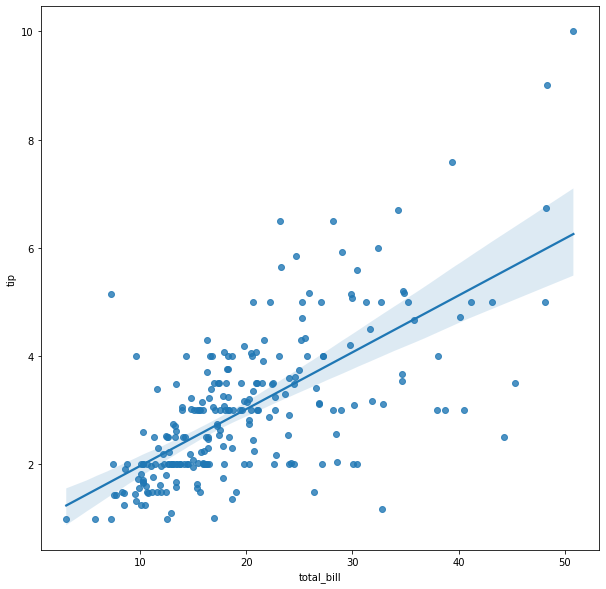

In [6]:
plt.figure(figsize=(10,10))
sns.regplot(x='total_bill', y='tip', data=tips)

## Modeling

we start to apply simple linear regression to the dataset:

- Y: tips
- x: total bills

In [7]:
sm_lm = OLS(tips['tip'], sm.add_constant(tips[['total_bill']]))
result = sm_lm.fit()

# dependent variable taro di depan ('tip')
# independent variable taro setelah sm.add_constant ('total_bill')

In [8]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           6.69e-34
Time:                        08:40:37   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

## Multiple Linear Regression

In [9]:
tips[['size','total_bill','tip']]

# size: jumlah orang dlm 1 meja

size  total_bill   tip
0       2       16.99  1.01
1       3       10.34  1.66
2       3       21.01  3.50
3       2       23.68  3.31
4       4       24.59  3.61
..    ...         ...   ...
239     3       29.03  5.92
240     2       27.18  2.00
241     2       22.67  2.00
242     2       17.82  1.75
243     2       18.78  3.00

[244 rows x 3 columns]

In [10]:
tips[['size','total_bill','tip']].describe()

size  total_bill         tip
count  244.000000  244.000000  244.000000
mean     2.569672   19.785943    2.998279
std      0.951100    8.902412    1.383638
min      1.000000    3.070000    1.000000
25%      2.000000   13.347500    2.000000
50%      2.000000   17.795000    2.900000
75%      3.000000   24.127500    3.562500
max      6.000000   50.810000   10.000000

In [11]:
tips[['size','total_bill','tip']].corr()

size  total_bill       tip
size        1.000000    0.598315  0.489299
total_bill  0.598315    1.000000  0.675734
tip         0.489299    0.675734  1.000000

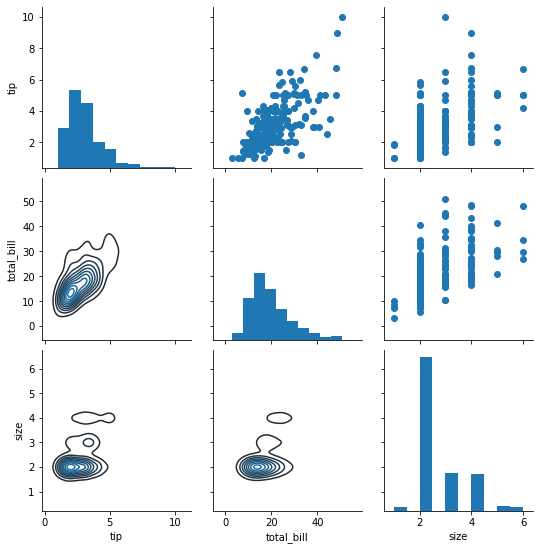

In [12]:
g = sns.PairGrid(tips[['tip','total_bill','size']])
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [13]:
sm_lm = OLS(tips['tip'], sm.add_constant(tips[['total_bill','size']]))
result = sm_lm.fit()

# dependent variable taro di depan ('tip')
# independent variable taro setelah sm.add_constant ('total_bill','size')

In [14]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           9.67e-34
Time:                        08:40:57   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

INTERPRETASI

- F-test Prob (F-statistic): <0.05 artinya ada cukup bukti bahwa salah satu atau semua di antara total_bill dan size mempengaruhi nilai tip

- P>|t|: <0.05 artinya ada cukup bukti bahwa baik total_bill maupun size meningkatkan nilai tip. (untuk melihat apakah coef nya signifikan atau tidak)

- coef:
    - coef total_bill : 0.0927, artinya setiap total_bill meningkat 1 dolar, maka tip yg        diberika meningkat 0.0927 dolar
    - coef size : 0.1926, artinya setiap orang dlm 1 meja bertambah 1 orang, maka tip yg              diberika meningkat 0.1926 dolar

- Adj. R-squared: 0.463, model yg kita buat bisa menjelaskan 46,3% dari semua variance tip. (meningkat dibanding ketika kita hanya menggunakan variable total_bill pada simple linear regression). (ini dihitung berdasarkan error)

## DIAGNOSTIC and COLLINEARITY

Regression Assumption

- Normality assumption
- Gauss-Markov assumption
- Multicollinearity

### Normality Assumption (Residual)

Residual adalah selisih antara nilai sebenarnya dikurangi nilai prediksi

Text(0.5, 0, 'Residual')

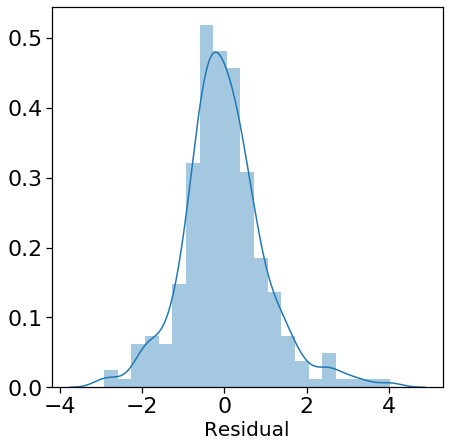

In [15]:
plt.figure(figsize=(7,7))
sns.set_context('notebook', font_scale=2)
sns.distplot(result.resid)
plt.xlabel('Residual', fontsize=20)

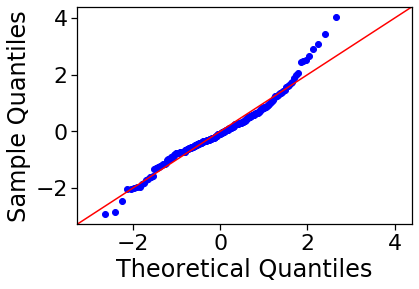

In [16]:
sm.qqplot(result.resid, line='45')
plt.show()

QQ plot artinya quantile-quantile plot

Gauss Markov Assumption

- Rata-rata error pada populasi adalah nol
- Error tidak berkorelasi dengan error tidak berkorelasi dgn error lainnya
- Error memiliki ragam yg homogen

Text(0, 0.5, 'Residual')

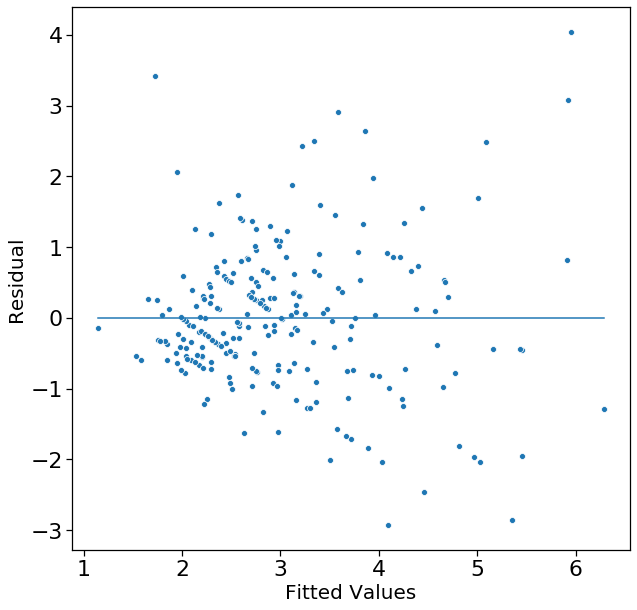

In [18]:
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)
sns.scatterplot(result.fittedvalues,result.resid)
sns.lineplot(result.fittedvalues,0)
plt.xlabel('Fitted Values', fontsize=20)
plt.ylabel('Residual', fontsize=20)



Kita bisa lihat dari diagram di atas:

- garisnya adalah Y, titik2nya adalah residual.
- yg kita mau kalau Gauss Markov adalah titiknya acak tapi merata dekat dengan garisnya (equal variance)
- tapi gambar di atas ngumpul di awal (tidak equal variance), jadi Gauss Markov tidak terpenuhi

Multicolinearity:

adanya korelasi antara 2 atau lebih independent variable.

Bagaimana mengidentifikasi Multicolinearity?

dengan Variance Inflation Factor (VIF): 
sebuah ukuran untuk penambahan pada variance di standard error of beta coefficient karena colliearity.

- VIF > 10 mengindikasikan collinearity very high
- VIF value > 4 is not acceptable. harus drop salah satu

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
def calc_vif(X):

    # calculating vif
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]

    return(vif)

In [21]:
calc_vif(tips[['total_bill','size']])

# VIF > 4 , maka drop salah satu feature, kita ambil total_bill karena korelasi dengan tip lebih besar

variables       VIF
0  total_bill  8.684373
1        size  8.684373

Assumption Assesment:

- Kalau kita melihat histogram, resudial terlihat terdistribusi normal
- Model residual berkumpul di sekitar 0 (tidak equal variance)
- Tidak ada pola tertentu pada residual plot
- Heteroscedasticity terjadi (sedangkan yg kita inginkan adalah Homoscedasticity)
- VIF not acceptable karena nilai VIF > 4, karena ada relationship antara 2 independent variable (total_bill dan size)

### Preprocessing: Dummy Variables

what to do if you have categorical data?

In [22]:
df_categorical = pd.DataFrame({
    'Gender':['Male','Female','Female','Male','Female','Female','Male'],
    'City':['Jakarta','Bogor','Bogor','Bekasi','Bekasi','Jakarta','Bekasi'],
    'Age':[34,28,23,26,29,25,25],
    'Income': [20000000,15000000,7000000,9000000,12000000,11000000,9000000]
})
df_categorical


Gender     City  Age    Income
0    Male  Jakarta   34  20000000
1  Female    Bogor   28  15000000
2  Female    Bogor   23   7000000
3    Male   Bekasi   26   9000000
4  Female   Bekasi   29  12000000
5  Female  Jakarta   25  11000000
6    Male   Bekasi   25   9000000

In [23]:
df_dummy = pd.get_dummies(df_categorical, drop_first=True)
df_dummy

# kalau ga di drop, nanti korelasinya (misal antara gender_male vs gender_female) jadi pasti terbalik (mencegah collinearity) 

Age    Income  Gender_Male  City_Bogor  City_Jakarta
0   34  20000000            1           0             1
1   28  15000000            0           1             0
2   23   7000000            0           1             0
3   26   9000000            1           0             0
4   29  12000000            0           0             0
5   25  11000000            0           0             1
6   25   9000000            1           0             0

Now, use multi linear regression with Total Bill, size, sex_Female, smoker_No, day_Fri, day_Sat, day_Sun, time_Dinnerhe variable as features/explanatory variables and with tips as target variable.

Analyze if linear regression assumptions is fulfilled!


Exercise: Create a new dataframe from Tips, named tips dummy, with dummy variables


In [24]:
df_dummy_tips = pd.get_dummies(tips, drop_first=True)
df_dummy_tips

total_bill   tip  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0         16.99  1.01     2           1          1        0        0        1   
1         10.34  1.66     3           0          1        0        0        1   
2         21.01  3.50     3           0          1        0        0        1   
3         23.68  3.31     2           0          1        0        0        1   
4         24.59  3.61     4           1          1        0        0        1   
..          ...   ...   ...         ...        ...      ...      ...      ...   
239       29.03  5.92     3           0          1        0        1        0   
240       27.18  2.00     2           1          0        0        1        0   
241       22.67  2.00     2           0          0        0        1        0   
242       17.82  1.75     2           0          1        0        1        0   
243       18.78  3.00     2           1          1        0        0        0   

     time_Dinner  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
239            1  
240            1  
241            1  
242            1  
243            1  

[244 rows x 9 columns]

In [26]:
calc_vif(df_dummy_tips[['total_bill','tip','size','sex_Female','smoker_No','day_Fri','day_Sat','day_Sun','time_Dinner']])

variables        VIF
0   total_bill  14.003716
1          tip  10.545278
2         size  12.513155
3   sex_Female   1.486353
4    smoker_No   2.663648
5      day_Fri   2.573633
6      day_Sat  17.750838
7      day_Sun  15.835251
8  time_Dinner  33.155949

Y : Tips

X : Total Bill, sex_Female, smoker_No, day_Fri, day_Sat, day_Sun


In [32]:
Y = 'tip'
X = ['total_bill','sex_Female','smoker_No','day_Fri','day_Sat','day_Sun']

sm_lm = OLS(df_dummy_tips[Y], sm.add_constant(df_dummy_tips[X]))
result = sm_lm.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     33.81
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           2.35e-29
Time:                        10:04:58   Log-Likelihood:                -349.51
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     237   BIC:                             737.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7819      0.238      3.285      0.0

In [31]:
calc_vif(df_dummy_tips[['total_bill','sex_Female','smoker_No','day_Fri','day_Sat','day_Sun']])

variables       VIF
0  total_bill  3.670370
1  sex_Female  1.439580
2   smoker_No  2.228945
3     day_Fri  1.175956
4     day_Sat  1.985433
5     day_Sun  2.068751

In [33]:
# Ganti feature (X)
# Mau ngecek apakah Adj R-Squarenya lebih bagus atau ga

Y = 'tip'
X = ['total_bill','sex_Female','smoker_No','time_Dinner']

sm_lm = OLS(df_dummy_tips[Y], sm.add_constant(df_dummy_tips[X]))
result = sm_lm.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     50.78
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           6.65e-31
Time:                        10:25:24   Log-Likelihood:                -349.90
No. Observations:                 244   AIC:                             709.8
Df Residuals:                     239   BIC:                             727.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7961      0.224      3.561      

# EXCERCISE: DIAMONDS DATASET

Homework: use linear regression for diamonds dataset. Try to find the best model without any multicollinearity.
Kumpulkan notebook tugas kalian ke Brigita.gems@gmail.com dengan subject: Tugas Linear Regression


In [35]:
df = sns.load_dataset('diamonds')
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [36]:
df_dummy_diamonds = pd.get_dummies(df, drop_first=True)
df_dummy_diamonds.head()

carat  depth  table  price     x     y     z  cut_Good  cut_Ideal  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43         0          1   
1   0.21   59.8   61.0    326  3.89  3.84  2.31         0          0   
2   0.23   56.9   65.0    327  4.05  4.07  2.31         1          0   
3   0.29   62.4   58.0    334  4.20  4.23  2.63         0          0   
4   0.31   63.3   58.0    335  4.34  4.35  2.75         1          0   

   cut_Premium  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0            0  ...        0        0        0           0            0   
1            1  ...        0        0        0           0            1   
2            0  ...        0        0        0           0            0   
3            1  ...        0        1        0           0            0   
4            0  ...        0        0        1           0            0   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0            1            0            0             0             0  
1            0            0            0             0             0  
2            0            1            0             0             0  
3            0            0            1             0             0  
4            1            0            0             0             0  

[5 rows x 24 columns]

In [37]:
df.corr()

carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000

artinya: 

- price punya korelasi kuat dgn carat
- price punya korelasi moderate dgn x,y,z

In [43]:
Y = 'price'
X = ['carat','depth','table','x','y','z']

sm_lm = OLS(df[Y], sm.add_constant(df[X]))
result = sm_lm.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.486e+04
Date:                Thu, 07 Jan 2021   Prob (F-statistic):               0.00
Time:                        10:40:42   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.085e+04    447.562     46.584      0.0

interpretasi:

- Prob (F-Stat): 0.00 (<0.05 artinya ada cukup bukti bahwa salah satu atau semua di antara feture X mempengaruhi nilai price)

- P>|t|: <0.05 artinya ada cukup bukti bahwa semua feature X meningkatkan nilai price. (untuk melihat apakah coef nya signifikan atau tidak)

- Adj.R-squared: 0.859 , model yg kita buat bisa menjelaskan 85,9% dari semua variance tip

## Diagnostic & Collinearity

### Normality Assumption

Text(0.5, 0, 'Residual')

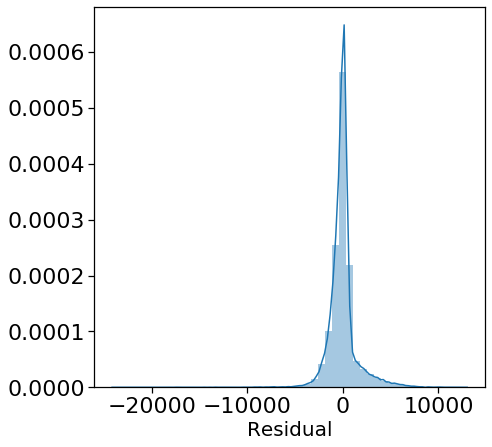

In [46]:
plt.figure(figsize=(7,7))
sns.set_context('notebook', font_scale=2)
sns.distplot(result.resid)
plt.xlabel('Residual', fontsize=20)

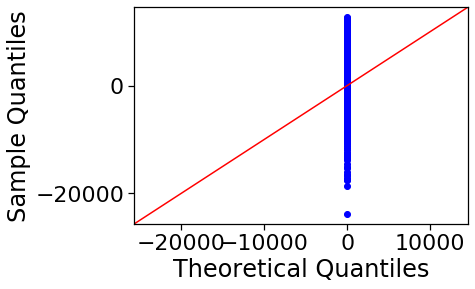

In [47]:
sm.qqplot(result.resid, line='45')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)
sns.scatterplot(result.fittedvalues,result.resid)
sns.lineplot(result.fittedvalues,0)
plt.xlabel('Fitted Values', fontsize=20)
plt.ylabel('Residual', fontsize=20)